In [307]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [308]:
df = pd.read_json("EcoDrivingData.json")

In [309]:
df.head()

,PartitionKey,id,from_datetime,to_datetime,data
0,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,{'subject_id': '9c2a617c-7539-11ec-aaba-3743e3...
1,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,{'subject_id': '159e257e-3315-11eb-be67-1fcb9c...
2,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,{'subject_id': '9c2a617c-7539-11ec-aaba-3743e3...
3,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,{'subject_id': '159e257e-3315-11eb-be67-1fcb9c...
4,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,8c16e20a-5905-11ed-825f-2fd98421a6b2,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,{'subject_id': '8c16e20a-5905-11ed-825f-2fd984...


In [310]:
df.shape

(1500, 5)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PartitionKey   1500 non-null   object
 1   id             1500 non-null   object
 2   from_datetime  1500 non-null   object
 3   to_datetime    1500 non-null   object
 4   data           1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [312]:
x = df["data"]

x[0]

{'subject_id': '9c2a617c-7539-11ec-aaba-3743e32733f5',
 'parameters': {'main_parameters': {'distance': 0,
   'driving_duration': 0,
   'fuel_consumed_count': 0,
   'fuel_consumption_rate': 0,
   'average_weight': 0,
   'average_turning_angle': 0,
   'average_gradient': 0,
   'fuel_consumption_by_weight': None,
   'total_score': 40},
  'acceleration_parameters': {'harsh_acceleration_event_count': 0,
   'good_acceleration_event_count': None,
   'bad_acceleration_event_count': None,
   'harsh_acceleration_event_rate': 0,
   'good_acceleration_event_rate': None,
   'bad_acceleration_event_rate': 0,
   'maximum_acceleration': None,
   'acceleration_score': 100},
  'cornering_parameters': {'cornering_rate': None,
   'cornering_event_count': None,
   'maximum_cornering': None},
  'cruise_control_parameters': {'cruise_control_percentage': None,
   'cruise_control_was_on_duration': None,
   'cruise_control_could_be_on_duration': None,
   'cruise_control_could_be_on_distance': None,
   'cruise_c

In [313]:
data_expanded = pd.json_normalize(df["data"])
data_expanded.head(2)

,subject_id,parameters.main_parameters.distance,parameters.main_parameters.driving_duration,parameters.main_parameters.fuel_consumed_count,parameters.main_parameters.fuel_consumption_rate,parameters.main_parameters.average_weight,parameters.main_parameters.average_turning_angle,parameters.main_parameters.average_gradient,parameters.main_parameters.fuel_consumption_by_weight,parameters.main_parameters.total_score,...,parameters.braking_parameters.harsh_braking_event_count,parameters.braking_parameters.harsh_braking_event_rate,parameters.braking_parameters.stops_event_count,parameters.braking_parameters.retarder_distance,parameters.braking_parameters.retarder_without_cruise_control_distance,parameters.braking_parameters.parking_brake_abuse_event_count,parameters.braking_parameters.retarder_without_cruise_control_distance_percentage,parameters.braking_parameters.retarder_distance_percentage,parameters.braking_parameters.parking_brake_abuse_rate,parameters.braking_parameters.braking_score
0,9c2a617c-7539-11ec-aaba-3743e32733f5,0.00,0,0.00,0.00,0,0.00,0.00,None,40,...,0,0.00,None,None,None,None,None,None,None,40
1,159e257e-3315-11eb-be67-1fcb9c0fdce7,22.86,3958,1.52,6.66,0,15.48,1.32,None,17,...,242,1058.43,None,None,None,None,None,None,None,0


In [314]:
# Load Json file into a DataFrame

data = pd.read_json("EcoDrivingData.json")

# Normalise the nested JSon data in the `data` column

data_expanded = pd.json_normalize(df["data"])

# Drop the original `data` column and join the normalised column

df = data.drop(columns = ["data"]).join(data_expanded)

df.head()

,PartitionKey,id,from_datetime,to_datetime,subject_id,parameters.main_parameters.distance,parameters.main_parameters.driving_duration,parameters.main_parameters.fuel_consumed_count,parameters.main_parameters.fuel_consumption_rate,parameters.main_parameters.average_weight,...,parameters.braking_parameters.harsh_braking_event_count,parameters.braking_parameters.harsh_braking_event_rate,parameters.braking_parameters.stops_event_count,parameters.braking_parameters.retarder_distance,parameters.braking_parameters.retarder_without_cruise_control_distance,parameters.braking_parameters.parking_brake_abuse_event_count,parameters.braking_parameters.retarder_without_cruise_control_distance_percentage,parameters.braking_parameters.retarder_distance_percentage,parameters.braking_parameters.parking_brake_abuse_rate,parameters.braking_parameters.braking_score
0,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,9c2a617c-7539-11ec-aaba-3743e32733f5,0.00,0,0.00,0.00,0,...,0,0.00,None,None,None,None,None,None,None,40
1,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,159e257e-3315-11eb-be67-1fcb9c0fdce7,22.86,3958,1.52,6.66,0,...,242,1058.43,None,None,None,None,None,None,None,0
2,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,9c2a617c-7539-11ec-aaba-3743e32733f5,14.95,2372,0.00,0.00,0,...,0,0.00,None,None,None,None,None,None,None,40
3,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,159e257e-3315-11eb-be67-1fcb9c0fdce7,194.87,14916,16.66,8.55,0,...,564,289.42,None,None,None,None,None,None,None,0
4,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,8c16e20a-5905-11ed-825f-2fd98421a6b2,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,8c16e20a-5905-11ed-825f-2fd98421a6b2,35.37,17700,0.00,0.00,0,...,144,407.11,None,None,None,None,None,None,None,0


In [315]:
df.shape

(1500, 125)

In [316]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parameters.main_parameters.distance,1499.0,159.723836,229.273294,0.0,11.3850,48.040,187.2550,1271.55
parameters.main_parameters.driving_duration,1500.0,14916.356667,14822.395493,0.0,3104.5000,10883.000,19573.2500,56892.00
parameters.main_parameters.fuel_consumed_count,1499.0,1.800660,6.289591,0.0,0.0000,0.000,0.0000,77.48
parameters.main_parameters.fuel_consumption_rate,1499.0,1.455264,3.297489,0.0,0.0000,0.000,0.0000,42.86
parameters.main_parameters.average_weight,1500.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
parameters.main_parameters.average_turning_angle,1500.0,12.087647,9.655830,0.0,5.4600,11.290,18.9075,96.55
parameters.main_parameters.average_gradient,1500.0,0.586607,0.365839,0.0,0.4600,0.610,0.8300,2.80
parameters.main_parameters.total_score,1500.0,17.712000,14.041860,0.0,6.0000,17.000,23.0000,40.00
parameters.acceleration_parameters.harsh_acceleration_event_count,1500.0,42.720667,70.822020,0.0,0.0000,16.000,56.0000,759.00
parameters.acceleration_parameters.good_acceleration_event_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
# Function to clean the columns

def clean_column_name(col):
    if "parameters" in col:
        return col.split(".")[-1]
    return col

# Apply the function to clean the dataset

df.columns = [clean_column_name(col) for col in df.columns]

df.head(2)

,PartitionKey,id,from_datetime,to_datetime,subject_id,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_weight,...,harsh_braking_event_count,harsh_braking_event_rate,stops_event_count,retarder_distance,retarder_without_cruise_control_distance,parking_brake_abuse_event_count,retarder_without_cruise_control_distance_percentage,retarder_distance_percentage,parking_brake_abuse_rate,braking_score
0,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,9c2a617c-7539-11ec-aaba-3743e32733f5,0.00,0,0.00,0.00,0,...,0,0.00,None,None,None,None,None,None,None,40
1,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,159e257e-3315-11eb-be67-1fcb9c0fdce7,22.86,3958,1.52,6.66,0,...,242,1058.43,None,None,None,None,None,None,None,0


In [318]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,1499.0,159.723836,229.273294,0.0,11.3850,48.040,187.2550,1271.55
driving_duration,1500.0,14916.356667,14822.395493,0.0,3104.5000,10883.000,19573.2500,56892.00
fuel_consumed_count,1499.0,1.800660,6.289591,0.0,0.0000,0.000,0.0000,77.48
fuel_consumption_rate,1499.0,1.455264,3.297489,0.0,0.0000,0.000,0.0000,42.86
average_weight,1500.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
average_turning_angle,1500.0,12.087647,9.655830,0.0,5.4600,11.290,18.9075,96.55
average_gradient,1500.0,0.586607,0.365839,0.0,0.4600,0.610,0.8300,2.80
total_score,1500.0,17.712000,14.041860,0.0,6.0000,17.000,23.0000,40.00
harsh_acceleration_event_count,1500.0,42.720667,70.822020,0.0,0.0000,16.000,56.0000,759.00
good_acceleration_event_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
# Remove Columns with Null values greater than 3/4 of the len of the df

threshold = len(df) * (4/5)

threshold

1200.0

In [320]:
# Drop the columns with Null values Greater than or equal to the threshould set above

df = df.dropna(thresh = threshold, axis = 1)

df.shape

(1500, 34)

In [321]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,1499.0,159.723836,229.273294,0.0,11.3850,48.040,187.2550,1271.55
driving_duration,1500.0,14916.356667,14822.395493,0.0,3104.5000,10883.000,19573.2500,56892.00
fuel_consumed_count,1499.0,1.800660,6.289591,0.0,0.0000,0.000,0.0000,77.48
fuel_consumption_rate,1499.0,1.455264,3.297489,0.0,0.0000,0.000,0.0000,42.86
average_weight,1500.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
average_turning_angle,1500.0,12.087647,9.655830,0.0,5.4600,11.290,18.9075,96.55
average_gradient,1500.0,0.586607,0.365839,0.0,0.4600,0.610,0.8300,2.80
total_score,1500.0,17.712000,14.041860,0.0,6.0000,17.000,23.0000,40.00
harsh_acceleration_event_count,1500.0,42.720667,70.822020,0.0,0.0000,16.000,56.0000,759.00
harsh_acceleration_event_rate,1499.0,85.244123,732.690428,0.0,0.0000,16.480,54.6850,23529.41


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PartitionKey                    1500 non-null   object 
 1   id                              1500 non-null   object 
 2   from_datetime                   1500 non-null   object 
 3   to_datetime                     1500 non-null   object 
 4   subject_id                      1500 non-null   object 
 5   distance                        1499 non-null   float64
 6   driving_duration                1500 non-null   int64  
 7   fuel_consumed_count             1499 non-null   float64
 8   fuel_consumption_rate           1499 non-null   float64
 9   average_weight                  1500 non-null   int64  
 10  average_turning_angle           1500 non-null   float64
 11  average_gradient                1500 non-null   float64
 12  total_score                     15

In [323]:
#df = df.dropna()

In [324]:
#df.shape

In [325]:
average = df[["average_speed", "average_driving_speed"]]

In [326]:
average

,average_speed,average_driving_speed
0,0.00,0.00
1,20.80,20.80
2,22.68,22.68
3,47.03,50.43
4,7.19,13.86
...,...,...
1495,52.04,NaN
1496,16.74,17.24
1497,0.59,0.59
1498,47.53,54.20


In [327]:
columns_to_drop = ["PartitionKey","id", "from_datetime", "subject_id", "to_datetime"] # not needed

df = df.drop(columns = columns_to_drop)

In [328]:
df.head(2)

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_weight,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,...,overspeeding_duration,overspeeding_percentage,speed_score,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score
0,0.00,0,0.00,0.00,0,0.00,0.00,40,0,0.00,...,0,0.00,0,0,0.00,0,0.00,0,0.00,40
1,22.86,3958,1.52,6.66,0,15.48,1.32,17,37,161.83,...,69,1.74,0,89,389.26,123,537.96,242,1058.43,0


In [329]:
df.corr()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_weight,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,...,overspeeding_duration,overspeeding_percentage,speed_score,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score
distance,1.000000,0.939920,0.139914,-0.069342,NaN,-0.278735,0.032619,-0.239572,0.262407,-0.055641,...,0.706223,0.537802,NaN,0.321896,-0.079037,0.744628,-0.177926,0.443621,-0.120443,-0.289260
driving_duration,0.939920,1.000000,0.154690,-0.001503,NaN,-0.131865,0.160420,-0.411184,0.334487,-0.056909,...,0.654936,0.493318,NaN,0.399234,-0.073419,0.786557,-0.123726,0.534464,-0.098876,-0.436032
fuel_consumed_count,0.139914,0.154690,1.000000,0.608470,NaN,-0.003587,0.124390,-0.065642,0.725838,0.008936,...,0.519928,0.615135,NaN,0.736539,0.026461,0.177931,-0.036364,0.739160,0.051943,-0.165437
fuel_consumption_rate,-0.069342,-0.001503,0.608470,1.000000,NaN,0.160476,0.195032,-0.151823,0.567219,0.123200,...,0.173354,0.303677,NaN,0.593373,0.137960,0.007651,0.066874,0.575423,0.223512,-0.234728
average_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_turning_angle,-0.278735,-0.131865,-0.003587,0.160476,NaN,1.000000,0.659947,-0.542501,0.012097,-0.014935,...,-0.229655,-0.189127,NaN,0.008507,0.019344,-0.132198,0.294419,0.004001,0.091621,-0.579073
average_gradient,0.032619,0.160420,0.124390,0.195032,NaN,0.659947,1.000000,-0.545045,0.251838,-0.024501,...,0.019868,0.061636,NaN,0.252704,0.012751,0.237163,0.298535,0.253375,0.076632,-0.661737
total_score,-0.239572,-0.411184,-0.065642,-0.151823,NaN,-0.542501,-0.545045,1.000000,-0.227002,-0.072554,...,-0.177838,-0.154354,NaN,-0.263880,-0.072872,-0.187871,-0.162667,-0.326012,-0.106487,0.861509
harsh_acceleration_event_count,0.262407,0.334487,0.725838,0.567219,NaN,0.012097,0.251838,-0.227002,1.000000,0.024593,...,0.473870,0.545740,NaN,0.961288,0.056985,0.407365,0.011856,0.912733,0.092945,-0.348136
harsh_acceleration_event_rate,-0.055641,-0.056909,0.008936,0.123200,NaN,-0.014935,-0.024501,-0.072554,0.024593,1.000000,...,-0.032089,-0.024561,NaN,0.017378,0.623847,-0.044601,0.055738,0.001104,0.494339,-0.039069


In [330]:
# Drop columns with zero entries only

zeros_column = ["speed_score", "average_weight", "cruise_control_score", "engine_score"]

df = df.drop(columns = zeros_column)

df.shape

(1500, 25)

In [331]:
df.corr()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,maximum_speed,overspeeding_duration,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score
distance,1.000000,0.939920,0.139914,-0.069342,-0.278735,0.032619,-0.239572,0.262407,-0.055641,-0.303470,...,0.671438,0.706223,0.537802,0.321896,-0.079037,0.744628,-0.177926,0.443621,-0.120443,-0.289260
driving_duration,0.939920,1.000000,0.154690,-0.001503,-0.131865,0.160420,-0.411184,0.334487,-0.056909,-0.448912,...,0.768942,0.654936,0.493318,0.399234,-0.073419,0.786557,-0.123726,0.534464,-0.098876,-0.436032
fuel_consumed_count,0.139914,0.154690,1.000000,0.608470,-0.003587,0.124390,-0.065642,0.725838,0.008936,-0.170716,...,0.195035,0.519928,0.615135,0.736539,0.026461,0.177931,-0.036364,0.739160,0.051943,-0.165437
fuel_consumption_rate,-0.069342,-0.001503,0.608470,1.000000,0.160476,0.195032,-0.151823,0.567219,0.123200,-0.263161,...,0.104517,0.173354,0.303677,0.593373,0.137960,0.007651,0.066874,0.575423,0.223512,-0.234728
average_turning_angle,-0.278735,-0.131865,-0.003587,0.160476,1.000000,0.659947,-0.542501,0.012097,-0.014935,-0.541695,...,0.185559,-0.229655,-0.189127,0.008507,0.019344,-0.132198,0.294419,0.004001,0.091621,-0.579073
average_gradient,0.032619,0.160420,0.124390,0.195032,0.659947,1.000000,-0.545045,0.251838,-0.024501,-0.651255,...,0.482745,0.019868,0.061636,0.252704,0.012751,0.237163,0.298535,0.253375,0.076632,-0.661737
total_score,-0.239572,-0.411184,-0.065642,-0.151823,-0.542501,-0.545045,1.000000,-0.227002,-0.072554,0.861264,...,-0.578789,-0.177838,-0.154354,-0.263880,-0.072872,-0.187871,-0.162667,-0.326012,-0.106487,0.861509
harsh_acceleration_event_count,0.262407,0.334487,0.725838,0.567219,0.012097,0.251838,-0.227002,1.000000,0.024593,-0.359510,...,0.389958,0.473870,0.545740,0.961288,0.056985,0.407365,0.011856,0.912733,0.092945,-0.348136
harsh_acceleration_event_rate,-0.055641,-0.056909,0.008936,0.123200,-0.014935,-0.024501,-0.072554,0.024593,1.000000,-0.069376,...,-0.072271,-0.032089,-0.024561,0.017378,0.623847,-0.044601,0.055738,0.001104,0.494339,-0.039069
acceleration_score,-0.303470,-0.448912,-0.170716,-0.263161,-0.541695,-0.651255,0.861264,-0.359510,-0.069376,1.000000,...,-0.676700,-0.254742,-0.254745,-0.400540,-0.066668,-0.249599,-0.166705,-0.470428,-0.121541,0.944259


In [332]:
average = df[["average_speed", "average_driving_speed"]]

In [333]:
average.corr()

,average_speed,average_driving_speed
average_speed,1.000000,0.988158
average_driving_speed,0.988158,1.000000


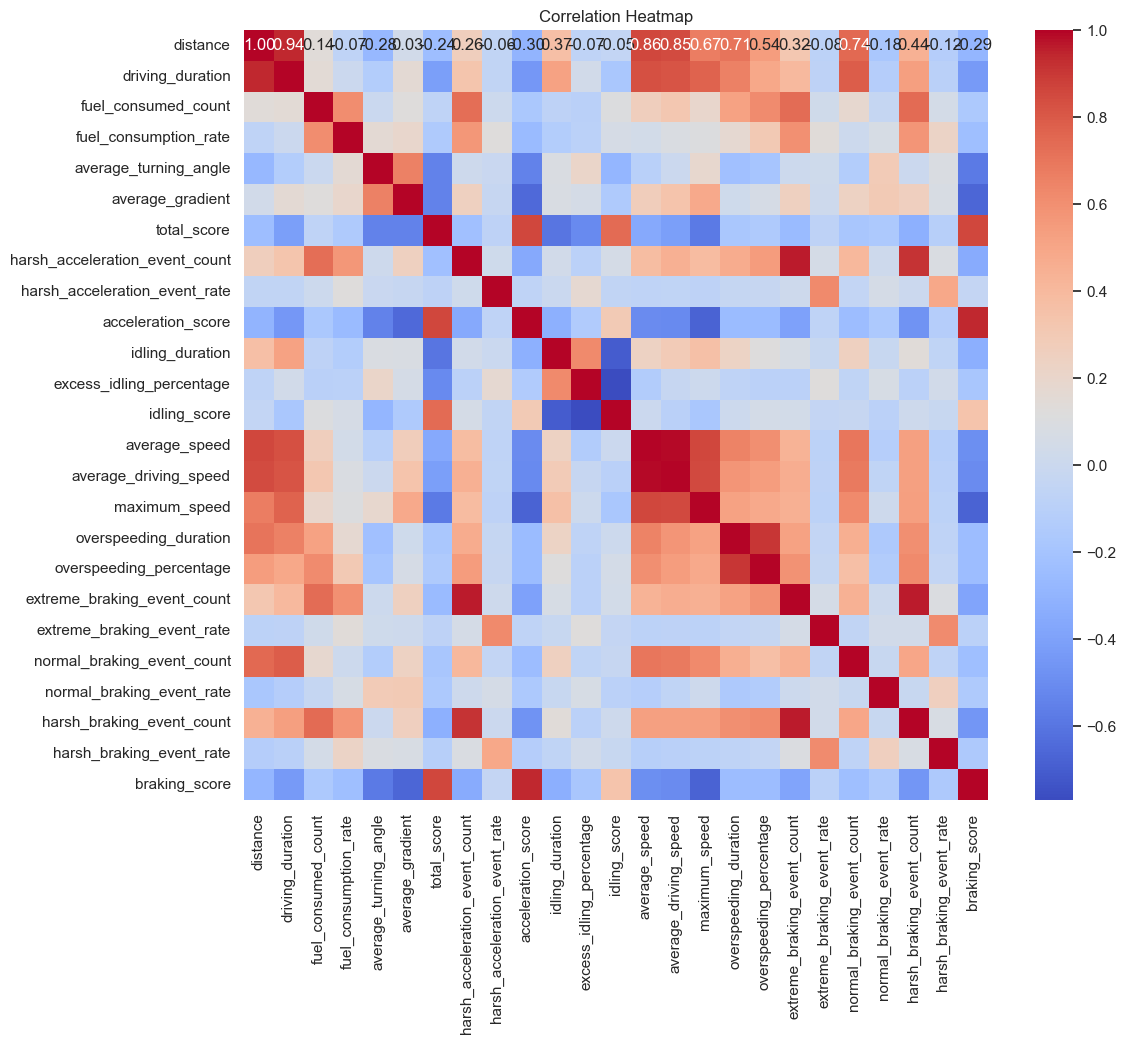

In [334]:
# Create a heatmap
# Calculate the correlation coefficient
corr = df.corr()

#Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, fmt=".2f", cmap = "coolwarm", cbar = True)

plt.title("Correlation Heatmap")

plt.show()

In [335]:
# drop average_driving_speed, it is similar to average_speed

df = df.drop(columns = "average_driving_speed")

df.shape

(1500, 24)

In [336]:
df.isnull().sum()

distance                          1
driving_duration                  0
fuel_consumed_count               1
fuel_consumption_rate             1
average_turning_angle             0
average_gradient                  0
total_score                       0
harsh_acceleration_event_count    0
harsh_acceleration_event_rate     1
acceleration_score                0
idling_duration                   0
excess_idling_percentage          0
idling_score                      0
average_speed                     1
maximum_speed                     0
overspeeding_duration             0
overspeeding_percentage           0
extreme_braking_event_count       0
extreme_braking_event_rate        1
normal_braking_event_count        0
normal_braking_event_rate         1
harsh_braking_event_count         0
harsh_braking_event_rate          1
braking_score                     0
dtype: int64

In [337]:
# Dropp Null columns
df = df.dropna()

df.shape

(1499, 24)

In [338]:
df.isnull().sum()

distance                          0
driving_duration                  0
fuel_consumed_count               0
fuel_consumption_rate             0
average_turning_angle             0
average_gradient                  0
total_score                       0
harsh_acceleration_event_count    0
harsh_acceleration_event_rate     0
acceleration_score                0
idling_duration                   0
excess_idling_percentage          0
idling_score                      0
average_speed                     0
maximum_speed                     0
overspeeding_duration             0
overspeeding_percentage           0
extreme_braking_event_count       0
extreme_braking_event_rate        0
normal_braking_event_count        0
normal_braking_event_rate         0
harsh_braking_event_count         0
harsh_braking_event_rate          0
braking_score                     0
dtype: int64

### Bulid Model

#### Import Libraries

In [339]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

#### Standardize Data

In [340]:
# Instantiate standard scaler
data_f=df
scaler = StandardScaler()

X = scaler.fit_transform(df)

In [341]:
X[0]

array([-0.69688509, -1.00733909, -0.28638767, -0.44147205, -1.2533404 ,
       -1.60590339,  1.58722162, -0.60368737, -0.11638281,  1.67757246,
       -0.61658203, -0.57918063,  0.71423623, -1.19712379, -1.72225693,
       -0.44949061, -0.44169975, -0.6750298 , -0.18532648, -0.81235111,
       -0.65820463, -0.7943246 , -0.31983157,  1.76269668])

#### K-means Clustering

The kmeans clustering will be in 3 clusters, since we are considering 3 levels:
- `low risk`
- `medium risk`
- `high risk`

In [342]:
# Define the number of clusters

clusters = 3

#Instantiate model
model_k = KMeans(n_clusters=clusters, random_state=42, n_init=1) # init = "kmeans++"

# Fit scaled data into the model

model_k.fit(X)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [343]:
model_k.labels_

array([0, 2, 0, ..., 0, 1, 0])

In [344]:
# Add the cluster labels to the DataFrame

df["cluster"] = model_k.labels_

df.head()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,overspeeding_duration,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score,cluster
0,0.00,0,0.00,0.00,0.00,0.00,40,0,0.00,100,...,0,0.00,0,0.00,0,0.00,0,0.00,40,0
1,22.86,3958,1.52,6.66,15.48,1.32,17,37,161.83,0,...,69,1.74,89,389.26,123,537.96,242,1058.43,0,2
2,14.95,2372,0.00,0.00,9.29,0.62,40,0,0.00,100,...,0,0.00,0,0.00,63,421.55,0,0.00,40,0
3,194.87,14916,16.66,8.55,12.47,0.74,13,157,80.56,0,...,3234,21.68,285,146.25,278,142.66,564,289.42,0,1
4,35.37,17700,0.00,0.00,23.17,0.82,0,30,84.82,0,...,0,0.00,43,121.57,166,469.31,144,407.11,0,2


##### Visualise the clusters

Reduce the dimensions of the data set using `PCA` - Principal Component Analysis

In [345]:
# Reduce Dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca

array([[-4.10576557,  2.28058945],
       [ 0.41439796, -0.85798265],
       [-2.72514683,  1.31485363],
       ...,
       [-3.73017316,  1.81177151],
       [ 3.78356483, -0.3099546 ],
       [-4.10576557,  2.28058945]])

In [346]:
# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

df_pca.head()

,PCA1,PCA2,cluster
0,-4.105766,2.280589,0.0
1,0.414398,-0.857983,2.0
2,-2.725147,1.314854,0.0
3,5.404923,2.601539,1.0
4,0.556376,-4.165134,2.0


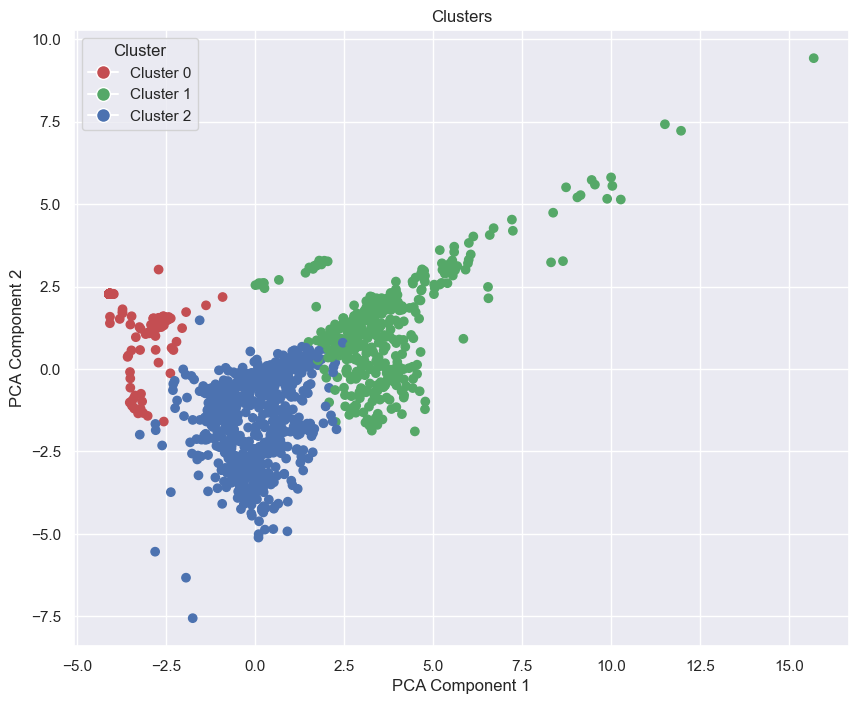

In [347]:
# Define colors for the clusters (RGB)
colors = ['r', 'g', 'b']

# Map each cluster number to its corresponding color
cluster_colors = df['cluster'].map({0: 'r', 1: 'g', 2: 'b'})

# Plot the PCA results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
plt.legend(handles=handles, title='Cluster')

plt.title("Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()


#### Hierarchical Clustering
For hierarchical clustering, we use AgglomerativeClustering with 3 clusters, since we are considering 3 levels:

- `low risk`
- `medium risk`
- `high risk`

In [348]:
# Define the number of clusters
num_clusters = 3

# Fit hierarchical clustering
model_h = AgglomerativeClustering(n_clusters=num_clusters)

df['cluster2'] = model_h.fit_predict(X)

In [349]:
df.head()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score,cluster,cluster2
0,0.00,0,0.00,0.00,0.00,0.00,40,0,0.00,100,...,0.00,0,0.00,0,0.00,0,0.00,40,0,1
1,22.86,3958,1.52,6.66,15.48,1.32,17,37,161.83,0,...,1.74,89,389.26,123,537.96,242,1058.43,0,2,2
2,14.95,2372,0.00,0.00,9.29,0.62,40,0,0.00,100,...,0.00,0,0.00,63,421.55,0,0.00,40,0,1
3,194.87,14916,16.66,8.55,12.47,0.74,13,157,80.56,0,...,21.68,285,146.25,278,142.66,564,289.42,0,1,0
4,35.37,17700,0.00,0.00,23.17,0.82,0,30,84.82,0,...,0.00,43,121.57,166,469.31,144,407.11,0,2,2


#### Visualise Clusters

In [350]:
# Create a DataFrame for PCA results
df_pca2 = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca2['cluster'] = df['cluster2']

df_pca2.head()

,PCA1,PCA2,cluster
0,-4.105766,2.280589,1.0
1,0.414398,-0.857983,2.0
2,-2.725147,1.314854,1.0
3,5.404923,2.601539,0.0
4,0.556376,-4.165134,2.0


In [351]:
df.head()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score,cluster,cluster2
0,0.00,0,0.00,0.00,0.00,0.00,40,0,0.00,100,...,0.00,0,0.00,0,0.00,0,0.00,40,0,1
1,22.86,3958,1.52,6.66,15.48,1.32,17,37,161.83,0,...,1.74,89,389.26,123,537.96,242,1058.43,0,2,2
2,14.95,2372,0.00,0.00,9.29,0.62,40,0,0.00,100,...,0.00,0,0.00,63,421.55,0,0.00,40,0,1
3,194.87,14916,16.66,8.55,12.47,0.74,13,157,80.56,0,...,21.68,285,146.25,278,142.66,564,289.42,0,1,0
4,35.37,17700,0.00,0.00,23.17,0.82,0,30,84.82,0,...,0.00,43,121.57,166,469.31,144,407.11,0,2,2


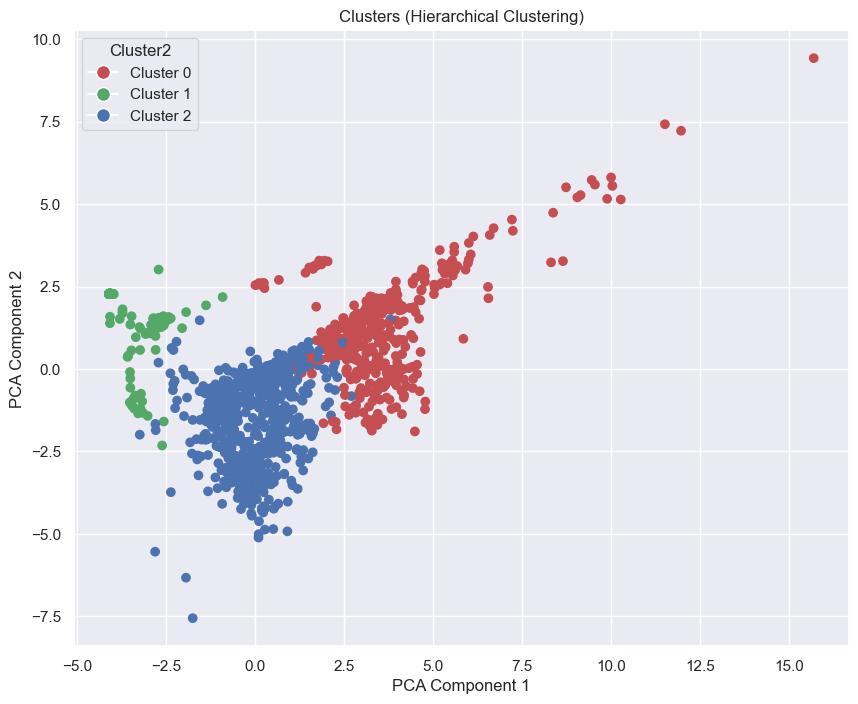

In [352]:
# Define colors for the clusters (RGB)
colors = ['r', 'g', 'b']

# Map each cluster number to its corresponding color
cluster_colors = df['cluster2'].map({0: 'r', 1: 'g', 2: 'b'})

# Plot the PCA results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
plt.legend(handles=handles, title='Cluster2')

plt.title("Clusters (Hierarchical Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()


In [353]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [354]:
data_f.columns

Index(['distance', 'driving_duration', 'fuel_consumed_count',
       'fuel_consumption_rate', 'average_turning_angle', 'average_gradient',
       'total_score', 'harsh_acceleration_event_count',
       'harsh_acceleration_event_rate', 'acceleration_score',
       'idling_duration', 'excess_idling_percentage', 'idling_score',
       'average_speed', 'maximum_speed', 'overspeeding_duration',
       'overspeeding_percentage', 'extreme_braking_event_count',
       'extreme_braking_event_rate', 'normal_braking_event_count',
       'normal_braking_event_rate', 'harsh_braking_event_count',
       'harsh_braking_event_rate', 'braking_score', 'cluster', 'cluster2'],
      dtype='object')

In [355]:
data_f['driving_duration_hr']=data_f['driving_duration']/3600
data_f['ave_speed']=data_f['distance']/(data_f['driving_duration_hr'])
data_f['overspeeding_duration']=1/(1+data_f['overspeeding_duration']/3600)
data_f['harsh_braking_rate']=np.where(df['driving_duration_hr']==0, 0, np.where(df['harsh_braking_event_count']==0,100, 100-(df['harsh_braking_event_count']/df['driving_duration_hr'])))
data_f['harsh_acceleration_rate']=np.where(df['driving_duration_hr'] == 0, 0, np.where(df['harsh_acceleration_event_count'] == 0, 100, 100-(df['harsh_acceleration_event_count'] / df['driving_duration_hr'])))
data_f['over_speeding_rate']=np.where(df['driving_duration_hr']==0,0, np.where(df['overspeeding_duration']==0,100,100-np.tanh(df['overspeeding_duration']/df['driving_duration_hr']) ))
#harsh accelaration duration is a more data metric to use instead of count
#data_f=data_f[(data_f['fuel_consumed_count'] !=0)|(data_f['fuel_consumption_rate']!=0)]
limited_speed=70

data_f['speed_point']=np.where(data_f['ave_speed']==0,0,np.where(data_f['ave_speed']<=limited_speed,100,100+((limited_speed-data_f['ave_speed'])*100/limited_speed)))
#print(data_f['average_speed'])
data_f.fillna(0, inplace=True)
data_f.head()
spread_sheet_df=data_f.copy()

#harsh braking event rate of the original data and and other rate compared to generated rate from code

In [356]:
data_test_df=data_f[['speed_point','over_speeding_rate','harsh_acceleration_rate','harsh_braking_rate']]
#data_test_df.loc[data_test_df['speed_point']==100, 'over_speeding_rate']=100
data_test_df.head()

,speed_point,over_speeding_rate,harsh_acceleration_rate,harsh_braking_rate
0,0.0,0.000000,0.000000,0.000000
1,100.0,99.287401,66.346640,-120.111167
2,100.0,99.091703,100.000000,100.000000
3,100.0,99.873542,62.107804,-36.122285
4,100.0,99.799369,93.898305,70.711864


In [357]:
#detecting NaN and infinity values in dataset and filling with zero or df.mean where applicable
raise_error={}
count=0
for col in data_test_df.columns:
    if np.any(np.isnan(data_test_df[col])):
        raise_error[col]=count+1
    elif np.any(np.isinf(data_test_df[col])):
        raise_error[col]=count+1

print(raise_error)


{'speed_point': 1}


In [358]:
data_test_df=data_test_df.replace([np.inf,-np.inf],0)
for col in data_test_df.columns:
   if np.any(np.isinf(data_test_df[col])) or np.any(np.isnan(data_test_df[col])):
      print(col)
   else:
      print('nothing found')

nothing found
nothing found
nothing found
nothing found


In [359]:
from sklearn.ensemble import IsolationForest  # Anomaly detection model
count=0
# Feature scaling
#clip harsh braking rate
#data_test_df['harsh_braking_rate']=data_test_df['harsh_braking_rate'].clip(0,100)
#scaler = StandardScaler()
print(data_test_df.shape)
#df_scaled = scaler.fit_transform(data_test_df)
print(data_test_df.min(),data_test_df.max())


(1499, 4)
speed_point                -37.782388
over_speeding_rate           0.000000
harsh_acceleration_rate     -9.565217
harsh_braking_rate        -139.166541
dtype: float64 speed_point                100.00000
over_speeding_rate          99.98296
harsh_acceleration_rate    100.00000
harsh_braking_rate         100.00000
dtype: float64


In [360]:
clf=IsolationForest(contamination='auto')
clf.fit(data_test_df[['speed_point','over_speeding_rate','harsh_braking_rate','harsh_acceleration_rate']])

y_pred=clf.predict(data_test_df[['speed_point','over_speeding_rate','harsh_braking_rate','harsh_acceleration_rate']])

outliers=data_test_df[y_pred==-1]

df_non_outliers=data_test_df[y_pred!=-1]
#the outliers is useful but it's not efficient, hence, needs to be tweaked

print(outliers)

      speed_point  over_speeding_rate  harsh_acceleration_rate  \
0             0.0            0.000000                 0.000000   
1           100.0           99.287401                66.346640   
3           100.0           99.873542                62.107804   
6           100.0           99.777119                57.836408   
9           100.0           99.825112                53.173318   
...           ...                 ...                      ...   
1475        100.0           99.271423                17.613782   
1476        100.0           99.000000                81.909548   
1482        100.0           99.717072                40.082411   
1494          0.0            0.000000                 0.000000   
1499          0.0            0.000000                 0.000000   

      harsh_braking_rate  
0               0.000000  
1            -120.111167  
3             -36.122285  
6             -58.226812  
9            -104.623767  
...                  ...  
1475         -135.

In [361]:
model = IsolationForest(contamination=0.1) 
model.fit(data_test_df)
anomaly_scores = model.decision_function(data_test_df)
print(anomaly_scores)

#check threshold of anomaly
for score in anomaly_scores:
    if score >0.3 or score<-0.3:
        count+=1

print(count)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[ 0.         -0.0735072   0.13196041 ...  0.10278564  0.18729871
  0.        ]
0


In [362]:
import scipy.stats as stats
def detect_outliers_isolation_forest(data, contamination=0.1):
  clf = IsolationForest(contamination=contamination)
  clf.fit(data)
  y_pred = clf.predict(data)
  outliers = data[y_pred == -1]
  outlier_percentage = len(outliers) / len(data) * 100
  return outlier_percentage

# Z-score method
def detect_outliers_zscore(data, threshold=3):
  z_scores = stats.zscore(data)
  outliers = data[np.abs(z_scores) > threshold]
  outlier_percentage = len(outliers) / len(data) * 100
  return outlier_percentage

# Example usage
for i in data_test_df.columns:
   outlier_percentage_isolation_forest = detect_outliers_isolation_forest(np.array(data_test_df[i].to_numpy().reshape(-1,1)))
   outlier_percentage_zscore = detect_outliers_zscore(np.array(data_test_df[i].to_numpy().reshape(-1,1)))

print("Outlier percentage using Isolation Forest:", outlier_percentage_isolation_forest)
print("Outlier percentage using Z-score:", outlier_percentage_zscore)

Outlier percentage using Isolation Forest: 10.00667111407605
Outlier percentage using Z-score: 1.0673782521681119


In [363]:

# Normalize anomaly scores to a 0-100 range for risk scores
data_test_df['risk_score_unsupervised'] = (anomaly_scores - anomaly_scores.min()) / (anomaly_scores.max() - anomaly_scores.min()) * 100


def classify_risk(score):
  if score >= 75: 
    return 'low_risk'
  elif score >= 45:
    return 'medium_risk'
  else:
    return 'high_risk'

#new_data
new_d= {'speed_point':[100.0,100.0,50.0,80,90,90,80,50,50,50,100.0,100.0,50.0,80,90,90,80,50,50,50,100.0,100.0,50.0,80,90,90,80,50,50,50,100.0,100.0,50.0,80,90,90,80,50,50,50,100.0,100.0,50.0,80,90,90,80,50,50,50],'over_speeding_rate':[100,0,50,20,10,10,20,50,50,50,100,0,50,20,10,10,20,50,50,50,100,0,50,20,10,10,20,50,50,50,100,0,50,20,10,10,20,50,50,50,100,0,50,20,10,10,20,50,50,50],'harsh_acceleration_rate':[100,0,100,100,100,0,0,100,100,100,100,0,100,100,100,0,0,100,100,100,100,0,100,100,100,0,0,100,100,100,100,0,100,100,100,0,0,100,100,100,100,0,100,100,100,0,0,100,100,100],'harsh_braking_rate':[100,-100,100,0,0,0,0,100,100,100,100,-100,100,0,0,0,0,100,100,100,100,-100,100,0,0,0,0,100,100,100,100,-100,100,0,0,0,0,100,100,100,100,-100,100,0,0,0,0,100,100,100],'risk_score_unsupervised':[100,54.3,67.5,60.36,64.36,54.36,50,60,60,60,100,54.3,67.5,60.36,64.36,54.36,50,60,60,60,100,54.3,67.5,60.36,64.36,54.36,50,60,60,60,100,54.3,67.5,60.36,64.36,54.36,50,60,60,60,100,54.3,67.5,60.36,64.36,54.36,50,60,60,60]}
df_new_d=pd.DataFrame(new_d)
#append datafrmae
data_test_df=pd.concat([data_test_df,df_new_d], ignore_index=True)
#conditional statement to make data of better quality
#data_test_df.loc[data_test_df['speed_point']==100, 'over_speeding_rate']=99

# Print or visualize risk scores and/or categories (unsupervised approach)
print("\nSample Risk Scores (Unsupervised):")
print(data_test_df.head())



Sample Risk Scores (Unsupervised):
   speed_point  over_speeding_rate  harsh_acceleration_rate  \
0          0.0            0.000000                 0.000000   
1        100.0           99.287401                66.346640   
2        100.0           99.091703               100.000000   
3        100.0           99.873542                62.107804   
4        100.0           99.799369                93.898305   

   harsh_braking_rate  risk_score_unsupervised  
0            0.000000                40.097712  
1         -120.111167                17.975847  
2          100.000000                79.810970  
3          -36.122285                61.730528  
4           70.711864                97.040148  


In [364]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

data_test=data_test_df.drop(columns=['risk_score_unsupervised'])
X=data_test
y=data_test_df['risk_score_unsupervised']
#train regressor to refine score
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
#predict risk scores for each rows of data
model=RandomForestRegressor(n_estimators=100,random_state=30)
model.fit(xtrain,ytrain)

#check if changes in score occur significantly
check_score=model.predict(xtest)

#predict new scores based on learning from previous scoring
pred_risk_score=model.predict(data_test)

#normalization
scaler=MinMaxScaler(feature_range=(0,100))
normalized_score=scaler.fit_transform(pred_risk_score.reshape(-1,1)).flatten()

data_test['risk_score_unsupervised']=normalized_score

data_test.head()
merged_spread_sheet_df=pd.concat([spread_sheet_df,data_test], axis=1)


In [365]:
#!pip install gspread

In [366]:
#!pip install --upgrade google-auth-httplib2 google-auth-oauthlib gspread


In [369]:
import gspread as gsp
from google.oauth2.service_account import Credentials

id_path= '../cred.json'
scope=['https://www.googleapis.com/auth/spreadsheets'] 
creds=Credentials.from_service_account_file('id_path')
clients=gsp.authorize(creds)

# Open or create a Google Sheet
sheet = clients.open('driver_scoring_sheet').sheet1  # Replace with your sheet name
spreadsheet_id='18bal4oBx949b3s1E3B2ww5ZJkFUCkMFQX0z-A_3uRYE'
# Clear existing data in the sheet
sheet.clear()
try:
    sheet = clients.open_by_key(spreadsheet_id).worksheet('driver_scoring_sheet')
    range_name = 'A1'  # Adjust starting cell if needed
    sheet_data = sheet.get_all_values()
    if not sheet_data:
        # Sheet is empty, write DataFrame to it
        sheet.update_values(range_name, df.values.tolist())
except gsp.exceptions.WorksheetNotFound:
    # Sheet doesn't exist, create it and write data
    sheet = clients.open_by_key(spreadsheet_id).add_worksheet(title='driver_scoring_sheet', rows=len(merged_spread_sheet_df) + 1, cols=len(merged_spread_sheet_df.columns))
    sheet.update_values('A1', merged_spread_sheet_df.values.tolist())



FileNotFoundError: [Errno 2] No such file or directory: 'id_path'

In [ ]:
#feature engineering for more realistic data
c=(data_test_df['speed_point']==100) & (data_test_df['over_speeding_rate']==100) & (data_test_df['harsh_acceleration_rate']==100) & (data_test_df['harsh_braking_rate']==100)

data_test_df.loc[c,'risk_score_unsupervised']=100

new_features=['speed_point','harsh_braking_rate','harsh_acceleration_rate','over_speeding_rate']
new_df_features=data_test[new_features]
new_df_features.head()

,speed_point,harsh_braking_rate,harsh_acceleration_rate,over_speeding_rate
0,0.0,0.000000,0.000000,0.000000
1,100.0,-120.111167,66.346640,99.287401
2,100.0,100.000000,100.000000,99.091703
3,100.0,-36.122285,62.107804,99.873542
4,100.0,70.711864,93.898305,99.799369


In [ ]:
new_df_features.corr()
new_df=new_df_features
#new_df.shape
new_df.shape

for col_name in new_df.columns:
    new_df[col_name].fillna(method='ffill')

for col_name in new_df.columns:
    new_df[col_name].fillna(method='bfill')

new_df.empty
new_df.isna().sum()


C:\Users\user\AppData\Local\Temp\ipykernel_20780\2269770547.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df[col_name].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_20780\2269770547.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df[col_name].fillna(method='bfill')


speed_point                0
harsh_braking_rate         0
harsh_acceleration_rate    0
over_speeding_rate         0
dtype: int64

In [ ]:
from scipy import stats
"""def identify_outlier_rows(data_test_df, num_stds=3):
  z_scores = np.abs(stats.zscore(df))  # Calculate z-scores
  outliers = np.any(z_scores > num_stds, axis=1)  # Check for outliers in any column
  return data_test_df[outliers]


outlier_rows = identify_outlier_rows(data_test_df)
print(f'outlier_rows:{outlier_rows}')

outlier_rows.shape

def remove_outliers_iqr(data_test_d, column_name, iqr_multiplier=1.5):
  Q1 = data_test_d[column_name].quantile(0.4)
  Q3 = data_test_d[column_name].quantile(0.6)
  IQR = Q3 - Q1
  lower_bound = Q1 - (iqr_multiplier * IQR)
  upper_bound = Q3 + (iqr_multiplier * IQR)
  return data_test_d[(data_test_d[column_name] >=lower_bound)&(data_test_d[column_name]<=upper_bound)]

new_df_noutliers=remove_outliers_iqr(data_test_df,new_features,1.5)
print(f'non outliers: {new_df_noutliers.shape}')

new_df_noutliers.isna().sum()"""

"def identify_outlier_rows(data_test_df, num_stds=3):\n  z_scores = np.abs(stats.zscore(df))  # Calculate z-scores\n  outliers = np.any(z_scores > num_stds, axis=1)  # Check for outliers in any column\n  return data_test_df[outliers]\n\n\noutlier_rows = identify_outlier_rows(data_test_df)\nprint(f'outlier_rows:{outlier_rows}')\n\noutlier_rows.shape\n\ndef remove_outliers_iqr(data_test_d, column_name, iqr_multiplier=1.5):\n  Q1 = data_test_d[column_name].quantile(0.4)\n  Q3 = data_test_d[column_name].quantile(0.6)\n  IQR = Q3 - Q1\n  lower_bound = Q1 - (iqr_multiplier * IQR)\n  upper_bound = Q3 + (iqr_multiplier * IQR)\n  return data_test_d[(data_test_d[column_name] >=lower_bound)&(data_test_d[column_name]<=upper_bound)]\n\nnew_df_noutliers=remove_outliers_iqr(data_test_df,new_features,1.5)\nprint(f'non outliers: {new_df_noutliers.shape}')\n\nnew_df_noutliers.isna().sum()"

In [ ]:
new_df_noutliers.dropna(subset=['speed_point','over_speeding_rate','harsh_acceleration_rate','harsh_braking_rate','risk_score_unsupervised'])
new_df_noutliers.fillna(0)
new_df_noutliers.head()

,speed_point,over_speeding_rate,harsh_acceleration_rate,harsh_braking_rate,risk_score_unsupervised
0,NaN,NaN,NaN,NaN,NaN
1,100.0,NaN,NaN,NaN,NaN
2,100.0,NaN,100.000000,NaN,NaN
3,100.0,0.126458,NaN,NaN,NaN
4,100.0,0.200631,93.898305,70.711864,NaN


In [ ]:
from sklearn.preprocessing import RobustScaler
"""new_df_noutliers.isnull().sum()

scaler = RobustScaler()

# Fit the scaler on the training data
rs_scaled_data=scaler.fit_transform(data_test_df)

#new_df_noutliers.isna().sum()
#print(scaled_data)

#drop rows with null values"""


'new_df_noutliers.isnull().sum()\n\nscaler = RobustScaler()\n\n# Fit the scaler on the training data\nrs_scaled_data=scaler.fit_transform(data_test_df)\n\n#new_df_noutliers.isna().sum()\n#print(scaled_data)\n\n#drop rows with null values'

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#using data_test_df for scaling
ss_scaled_data=scaler.fit(data_test_df)

print(ss_scaled_data)

StandardScaler()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 

In [ ]:
sc=MinMaxScaler(feature_range=(-50,50))
x=data_test_df[new_features]
y=data_test_df['risk_score_unsupervised']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

x_train_scaled=sc.fit_transform(xtrain)
x_test_scaled=sc.transform(xtest)

assert len(x)==len(y)
print(x.shape,y.shape)

x.isnull().sum()
y.isnull().sum()

np.isnan(x_train_scaled).any()
np.isnan(x_test_scaled).any()

print(x_test_scaled.shape,x_train_scaled.shape)
print(ytest.shape)

(1549, 4) (1549,)
(310, 4) (1239, 4)
(310,)


In [ ]:
#create a function to train each model
model1=LinearRegression()
model2=RandomForestRegressor(n_estimators=100,random_state=42) 
model3=DecisionTreeRegressor(random_state=40)
model4=SVR()

#linear regression
model1.fit(x_train_scaled,ytrain)
y_pred=model1.predict(x_test_scaled)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print(f'linear regression evaluation: mse_score is {mse} and r2_score is {r2}')

#random forest regression
model2.fit(x_train_scaled,ytrain)
y_pred=model2.predict(x_test_scaled)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print(f'random forest regression evaluation:  mse_score is {mse} and r2_score is {r2}')

#decision tree regressor
model3.fit(x_train_scaled,ytrain)
y_pred=model3.predict(x_test_scaled)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print(f'decision tree regressor evaluation:  mse_score is {mse} and r2_score is {r2}')

#support vector machine
model4.fit(x_train_scaled,ytrain)
y_pred=model4.predict(x_test_scaled)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print(f'Decision tree regression evaluation: mse_score is {mse} and r2_score is {r2}')

linear regression evaluation: mse_score is 128.0515916219393 and r2_score is 0.6977821690890442
random forest regression evaluation:  mse_score is 6.395675158540991 and r2_score is 0.9849054037584163
decision tree regressor evaluation:  mse_score is 17.424734347270988 and r2_score is 0.958875439563614
Decision tree regression evaluation: mse_score is 90.9847058527967 and r2_score is 0.7852646726165924


In [ ]:
print(new_features)
sc_data=sc.transform([[0,100,100,70]])
predictions=model2.predict(sc_data)
if predictions>=75:
    print('low_risk')
elif predictions>=45:
    print('medium risk')
else:
    print('high-risk')
print(predictions)

['speed_point', 'harsh_braking_rate', 'harsh_acceleration_rate', 'over_speeding_rate']
medium risk
[60.00453424]


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
#using kmeans clustering and agglomerative clustering
model_k=KMeans(n_clusters=3,random_state=43)
model_ag=AgglomerativeClustering(n_clusters=3,linkage="complete")
#scaled_new_df=scaler.fit_transform(new_df_noutliers)
#scaled_new_df.shape



In [ ]:
#scled data with outliers removed"


In [ ]:
"""model_ag.fit(scaled_data)
model_k.fit(scaled_data)"""

'model_ag.fit(scaled_data)\nmodel_k.fit(scaled_data)'

In [ ]:
#defining list of feature column to be used to cluster data (test case 1 and 2)
feature_col_1=['total_score','acceleration_score','braking_score','idling_score']

feature_col_2=['distance','driving_duration','fuel_consumed_count','fuel_consumption_rate','harsh_acceleration_event_count','overspeeding_percentage','extreme_braking_event_count','harsh_braking_event_count','normal_braking_event_count']

In [ ]:
#chi square to check relationship
from scipy.stats import chi2_contingency
df=data_f
def chi_square_test(df,f1,f2):
    contingency_table = pd.crosstab(df[f1], df[f2])
    chi2, pval, expected, observed = chi2_contingency(contingency_table)
    # Print the results
    print(f"Chi-Squared Statistic:{f1} and {f2} is", chi2)
    #print(f"p-value:{f1} and {f2}", pval)
    #print("Expected Contingency Table:\n", expected)
    #print("Observed Contingency Table:\n", observed)

# Interpretation (replace with your own based on the p-value threshold)
    if pval < 0.05:
        print("There is a statistically significant association between both columns")
    else:
        print("There is not enough evidence to conclude a statistically significant association")

In [ ]:
for i in range(len(feature_col_1)):
    for k in range(len(feature_col_1)):
        if i !=k:
           chi_square_test(df,feature_col_1[i],feature_col_1[k])

Chi-Squared Statistic:total_score and acceleration_score is 1405.0689078356077
There is a statistically significant association between both columns
Chi-Squared Statistic:total_score and braking_score is 2760.6546122530035
There is a statistically significant association between both columns
Chi-Squared Statistic:total_score and idling_score is 26192.091985112023
There is a statistically significant association between both columns
Chi-Squared Statistic:acceleration_score and total_score is 1405.0689078356077
There is a statistically significant association between both columns
Chi-Squared Statistic:acceleration_score and braking_score is 1337.397490550088
There is a statistically significant association between both columns
Chi-Squared Statistic:acceleration_score and idling_score is 223.8125158704633
There is a statistically significant association between both columns
Chi-Squared Statistic:braking_score and total_score is 2760.6546122530035
There is a statistically significant assoc

In [ ]:
for i in range(len(feature_col_2)):
    for k in range(len(feature_col_2)):
        if i !=k:
           chi_square_test(df,feature_col_2[i],feature_col_2[k])

Chi-Squared Statistic:distance and driving_duration is 1754968.4579586866
There is a statistically significant association between both columns
Chi-Squared Statistic:distance and fuel_consumed_count is 359219.95739754575
There is a statistically significant association between both columns
Chi-Squared Statistic:distance and fuel_consumption_rate is 280772.290730879
There is a statistically significant association between both columns
Chi-Squared Statistic:distance and harsh_acceleration_event_count is 314580.83425721683
There is a statistically significant association between both columns
Chi-Squared Statistic:distance and overspeeding_percentage is 537512.0675370728
There is a statistically significant association between both columns
Chi-Squared Statistic:distance and extreme_braking_event_count is 390137.7638198602
There is a statistically significant association between both columns
Chi-Squared Statistic:distance and harsh_braking_event_count is 756205.1703573451
There is a statist

In [ ]:
scaler=StandardScaler()
# unsupervised model to define data into low risk, high and medium
model_1=AgglomerativeClustering(n_clusters=3,linkage='average')

#using kmeans
model_2 =KMeans(n_clusters=3,random_state=48)

#feature for test case 1
df_feature_1=data_f[feature_col_1]
#feature for test case 2
df_feature_2=data_f[feature_col_2]

#transform features to reduce extremes
algo_df_1=scaler.fit_transform(df_feature_1)
algo_df_2=scaler.fit_transform(df_feature_2)

kmeans_df_1=scaler.fit_transform(df_feature_1)
kmeans_df_2=scaler.fit_transform(df_feature_2)

#model_1
clus_model1=model_1.fit(algo_df_1)
clus_model2=model_1.fit(algo_df_2)

#model_2
res_model1=model_2.fit(kmeans_df_1)
res_model2=model_2.fit(kmeans_df_2)

#cluster for model_1
cluster_label_1=clus_model1.labels_
cluster_label_2=clus_model2.labels_

#cluster for model_2
res_label_1=res_model1.labels_
res_label_2=res_model2.labels_

#duplicate dataframe from feature 1
df_dup_1=df_feature_1
df_dup_2=df_feature_2

kmeans_df_feature_1=df_feature_1
kmeans_df_feature_2=df_feature_2

#scaled dataframe for both feature 1 and feature 2 in kmeans and alggomerative clustering


#algo & feature 1
df_feature_1['risk_type']=cluster_label_1
#algo & feature 2
df_feature_2['risk_type']=cluster_label_2

#df_feature_1.head()
#df_feature_2.head()



#kmeans and feature 1
kmeans_df_feature_1['risk_type']=res_label_1
kmeans_df_feature_2['risk_type']=res_label_2

kmeans_df_feature_2.head()

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_20780\3367445609.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_1['risk_type']=cluster_label_1
C:\Users\user\AppData\Local\Temp\ipykernel_20780\3367445609.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,harsh_acceleration_event_count,overspeeding_percentage,extreme_braking_event_count,harsh_braking_event_count,normal_braking_event_count,risk_type
0,0.00,0,0.00,0.00,0,0.00,0,0,0,0
1,22.86,3958,1.52,6.66,37,1.74,89,242,123,0
2,14.95,2372,0.00,0.00,0,0.00,0,0,63,0
3,194.87,14916,16.66,8.55,157,21.68,285,564,278,2
4,35.37,17700,0.00,0.00,30,0.00,43,144,166,0


In [ ]:
#df_feature_1['risk_type'].value_counts()
"""risk_type
2    1480
0      18
1       1"""
#there are just 1 with risk type of medium
df_feature_2['risk_type'].value_counts()

risk_type
0    1108
1     297
2      94
Name: count, dtype: int64

In [ ]:
kmeans_df_feature_1['risk_type'].value_counts()

#kmeans_df_feature_2['risk_type'].value_counts()
"""risk_type
0    1108
1     297
2      94
"""

'risk_type\n0    1108\n1     297\n2      94\n'

(1499, 2)
float64
silhouette_score for algo clustering_feature_1: -0.24767969458611427
davies_bouldin_score for algo clustering_feature_1: 3.1830559776711915


Text(0.5, 1.0, 'component of features on risk type')

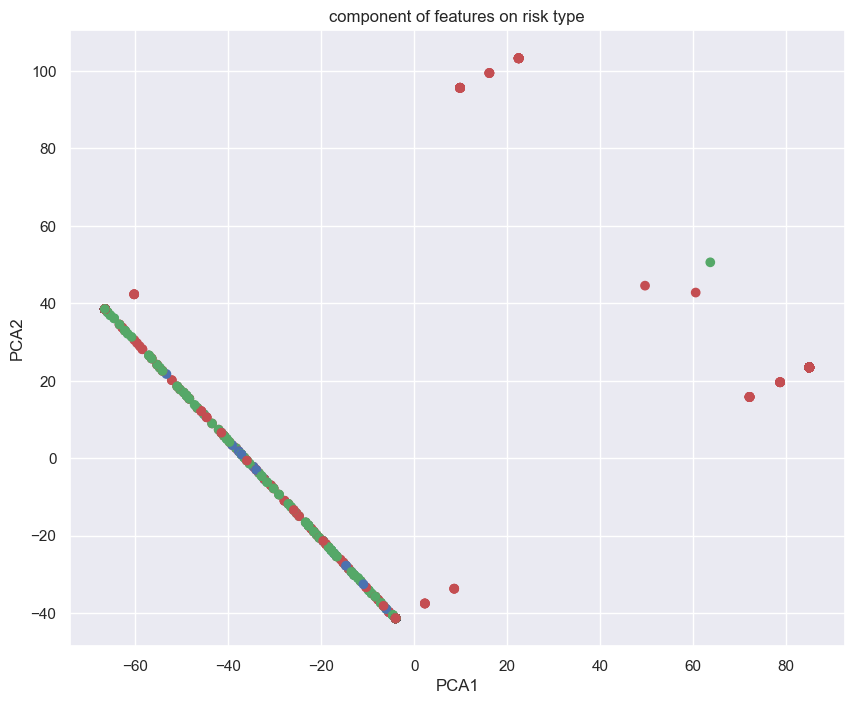

In [ ]:
#silhoutte score beforee pca
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

colors=['r','g','b']
#labeling clusters
risk_colors = df_feature_1['risk_type'].map({0: 'r', 1: 'g', 2: 'b'})

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
df
pca=PCA(n_components=2)
pca_df_1=pca.fit_transform(df_feature_1.drop('risk_type',axis=1))
print(pca_df_1.shape)
print(pca_df_1.dtype)
print(f"silhouette_score for algo clustering_feature_1: {silhouette_score(df_dup_1,df_feature_1['risk_type'])}")

print(f"davies_bouldin_score for algo clustering_feature_1: {davies_bouldin_score(df_dup_1,df_feature_1['risk_type'])}")

plt.figure(figsize=(10,8))
plt.scatter(pca_df_1[:,0],pca_df_1[:,1],c=risk_colors)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('component of features on risk type')


silhouette_score for algo clustering_feature_2: 0.42921095848438046
davies_bouldin_score for algo clustering_feature_2: 0.7280720951460719


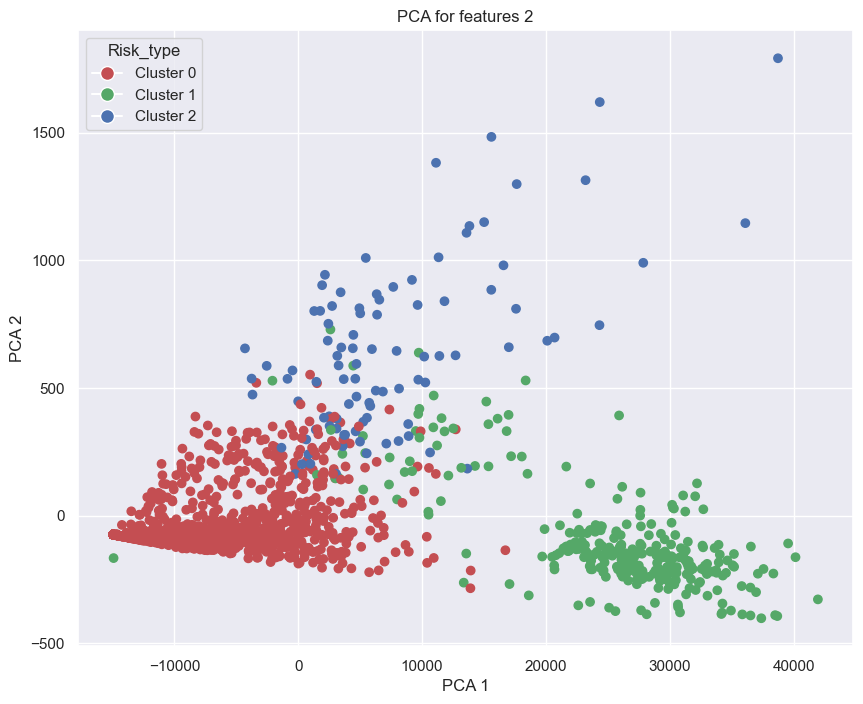

In [ ]:
#for data feature 2 for algo and df 2
pca_df_2=pca.fit_transform(df_dup_2)

colors=['r','g','b']
#labeling clusters
risk_colors = df_feature_2['risk_type'].map({0: 'r', 1: 'g', 2: 'b'})

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]


print(f"silhouette_score for algo clustering_feature_2: {silhouette_score(df_dup_2,df_feature_2['risk_type'])}")

print(f"davies_bouldin_score for algo clustering_feature_2: {davies_bouldin_score(df_dup_2,df_feature_2['risk_type'])}")
#df transform
#pca_df_2=pd.DataFrame(pca_df_2,columns=['PCA1','PCA2'])
#plot
plt.figure(figsize=(10,8))
plt.scatter(pca_df_2[:,0],pca_df_2[:,1],c=risk_colors)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for features 2')
plt.legend(handles=handles, title='Risk_type')
plt.show()

silhouette_score for kmeans clustering_feature_2: -0.2551771605828555
davies_bouldin_score for kmeans clustering_feature_2: 3.184869266752553


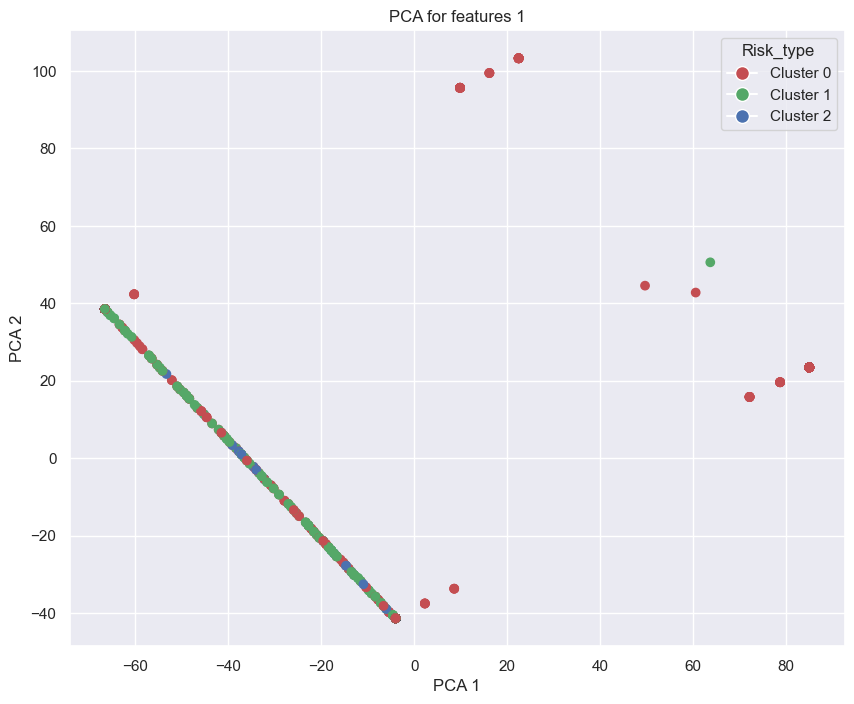

In [ ]:
#for data feature 1 and kmeans 
dup_kmeans_1=kmeans_df_feature_1.drop('risk_type',axis=1)
dup_kmeans_2=kmeans_df_feature_2.drop('risk_type',axis=1)
kpca_df_1=pca.fit_transform(dup_kmeans_1)

colors=['r','g','b']
#labeling clusters
risk_colors_k = kmeans_df_feature_1['risk_type'].map({0: 'r', 1: 'g', 2: 'b'})

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]


print(f"silhouette_score for kmeans clustering_feature_2: {silhouette_score(dup_kmeans_1,kmeans_df_feature_1['risk_type'])}")

print(f"davies_bouldin_score for kmeans clustering_feature_2: {davies_bouldin_score(dup_kmeans_1,kmeans_df_feature_1['risk_type'])}")
#df transform
#pca_df_2=pd.DataFrame(pca_df_2,columns=['PCA1','PCA2'])
#plot
plt.figure(figsize=(10,8))
plt.scatter(kpca_df_1[:,0],kpca_df_1[:,1],c=risk_colors_k)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for features 1')
plt.legend(handles=handles, title='Risk_type')
plt.show()

risk_type
0    1108
1     297
2      94
Name: count, dtype: int64
risk_type
0    1108
1     297
2      94
Name: count, dtype: int64
silhouette_score forkmeans clustering_feature_2: 0.42921094185004405
davies_bouldin_score for kmeans clustering_feature_2: 0.7280720999757647


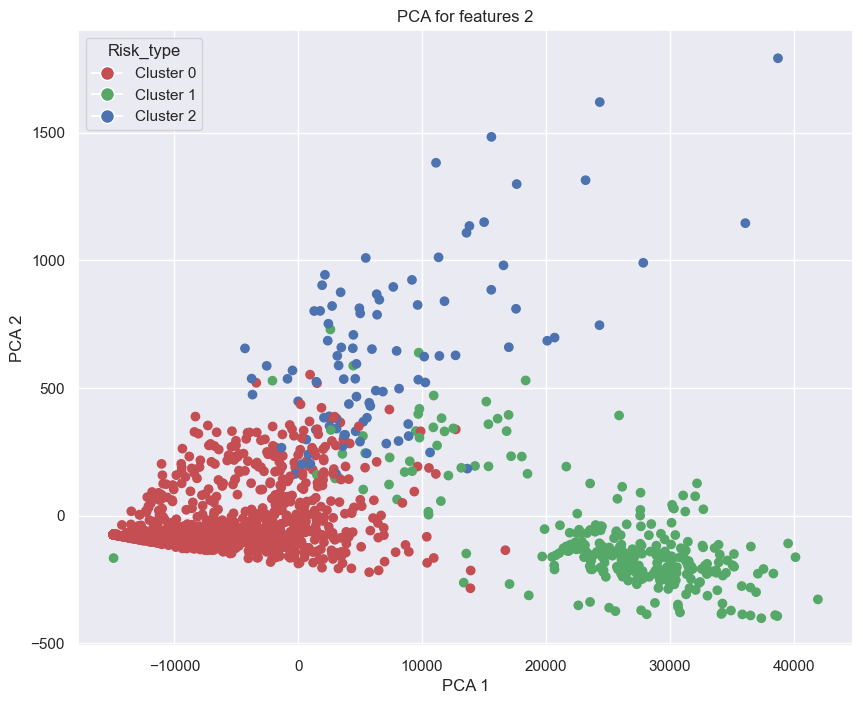

In [ ]:
#for data feature 2 and kmeans 
dup_kmeans_1=kmeans_df_feature_1.drop('risk_type',axis=1)
dup_kmeans_2=kmeans_df_feature_2.drop('risk_type',axis=1)
kpca_df_2=pca.fit_transform(dup_kmeans_2)

colors=['r','g','b']
#labeling clusters
risk_colors_k = kmeans_df_feature_2['risk_type'].map({0: 'r', 1: 'g', 2: 'b'})

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]

print(kmeans_df_feature_1['risk_type'].value_counts())
print(kmeans_df_feature_2['risk_type'].value_counts())
print(f"silhouette_score forkmeans clustering_feature_2: {silhouette_score(dup_kmeans_2,kmeans_df_feature_2['risk_type'])}")

print(f"davies_bouldin_score for kmeans clustering_feature_2: {davies_bouldin_score(dup_kmeans_2,kmeans_df_feature_2['risk_type'])}")
#df transform
#pca_df_2=pd.DataFrame(pca_df_2,columns=['PCA1','PCA2'])
#plot
plt.figure(figsize=(10,8))
plt.scatter(kpca_df_2[:,0],kpca_df_2[:,1],c=risk_colors_k)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for features 2')
plt.legend(handles=handles, title='Risk_type')
plt.show()

In [ ]:
#evaluating my unsupervised learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
new_data_1=df_feature_1.drop('risk_type',axis=1)
new_data_2=df_feature_2.drop('risk_type',axis=1)

target_1=df_feature_1['risk_type']
target_2=df_feature_2['risk_type']

In [ ]:
#split to train data for feature col 1
x_train,x_test,y_train,y_test=train_test_split(df_feature_1[feature_col_1],df_feature_1['risk_type'],test_size=0.2,random_state=42)

#split to train data for feature col 2
x_train2,x_test2,y_train2,y_test2=train_test_split(df_feature_2[feature_col_2],df_feature_2['risk_type'],test_size=0.2,random_state=42)

In [ ]:
#test for correlation
x_train.corr()
x_train2.corr()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,harsh_acceleration_event_count,overspeeding_percentage,extreme_braking_event_count,harsh_braking_event_count,normal_braking_event_count
distance,1.000000,0.939074,0.146503,-0.068996,0.256394,0.541840,0.317647,0.442746,0.737476
driving_duration,0.939074,1.000000,0.150260,-0.011261,0.325110,0.499012,0.389885,0.527225,0.786964
fuel_consumed_count,0.146503,0.150260,1.000000,0.600047,0.732690,0.635526,0.734004,0.734380,0.184884
fuel_consumption_rate,-0.068996,-0.011261,0.600047,1.000000,0.558364,0.310425,0.582153,0.563371,0.009428
harsh_acceleration_event_count,0.256394,0.325110,0.732690,0.558364,1.000000,0.551771,0.962045,0.917033,0.422053
overspeeding_percentage,0.541840,0.499012,0.635526,0.310425,0.551771,1.000000,0.593502,0.638027,0.380830
extreme_braking_event_count,0.317647,0.389885,0.734004,0.582153,0.962045,0.593502,1.000000,0.962334,0.460196
harsh_braking_event_count,0.442746,0.527225,0.734380,0.563371,0.917033,0.638027,0.962334,1.000000,0.517955
normal_braking_event_count,0.737476,0.786964,0.184884,0.009428,0.422053,0.380830,0.460196,0.517955,1.000000


In [ ]:
#model
models={"RFC":RandomForestClassifier(n_estimators=120,random_state=42),
"LR":LogisticRegression(random_state=42)
}

In [ ]:
#model training and evaluation from using scores
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_report=accuracy_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred,average='weighted')
    report=classification_report(y_test,y_pred)
    print(f"\nModel:{model_name}")
    print(f"accuracy:{accuracy_report:.3f}")
    print(f"f1_score:{f1score:.2f}")
    print(report)



Model:RFC
accuracy:0.740
f1_score:0.69
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       233
           1       0.30      0.15      0.20        52
           2       0.00      0.00      0.00        15

    accuracy                           0.74       300
   macro avg       0.36      0.36      0.35       300
weighted avg       0.66      0.74      0.69       300


Model:LR
accuracy:0.777
f1_score:0.68
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       233
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        15

    accuracy                           0.78       300
   macro avg       0.26      0.33      0.29       300
weighted avg       0.60      0.78      0.68       300



c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

In [ ]:
#model training and evaluation with first data using support vector machine
svc_model=SVC(kernel="linear",random_state=42)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
accuracy_report=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred,average='weighted')
report=classification_report(y_test,y_pred)
print(f"\nModel:SVC")
print(f"accuracy:{accuracy_report:.3f}")
print(f"f1_score:{f1score:.2f}")
print(report)


Model:SVC
accuracy:0.777
f1_score:0.68
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       233
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        15

    accuracy                           0.78       300
   macro avg       0.26      0.33      0.29       300
weighted avg       0.60      0.78      0.68       300



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model training and evaluation from using scores
for model_name,model in models.items():
    model.fit(x_train2,y_train2)
    y_pred=model.predict(x_test2)
    accuracy_report=accuracy_score(y_test2,y_pred)
    f1score=f1_score(y_test2,y_pred,average='weighted')
    report=classification_report(y_test2,y_pred)
    print(f"\nModel:{model_name}")
    print(f"accuracy:{accuracy_report:.3f}")
    print(f"f1_score:{f1score:.2f}")
    print(report)


Model:RFC
accuracy:0.990
f1_score:0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       233
           1       1.00      0.96      0.98        52
           2       0.94      1.00      0.97        15

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300


Model:LR
accuracy:0.930
f1_score:0.93
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       233
           1       0.81      0.92      0.86        52
           2       0.80      0.80      0.80        15

    accuracy                           0.93       300
   macro avg       0.86      0.89      0.87       300
weighted avg       0.93      0.93      0.93       300



c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#support vector machine model for the second form of features

svc_model2=SVC(kernel="linear",random_state=42)
svc_model2.fit(x_train2,y_train2)
y_pred=svc_model2.predict(x_test2)
accuracy_report=accuracy_score(y_test2,y_pred)
f1score=f1_score(y_test2,y_pred,average='weighted')
report=classification_report(y_test2,y_pred)
print(f"\nModel:SVC")
print(f"accuracy:{accuracy_report:.3f}")
print(f"f1_score:{f1score:.2f}")
print(report)


Model:SVC
accuracy:0.993
f1_score:0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       233
           1       1.00      0.96      0.98        52
           2       1.00      1.00      1.00        15

    accuracy                           0.99       300
   macro avg       1.00      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
"""
insights from result show that there are no enough data for certain class of data like low risk  (class 0) and medium risk (class 1). As a result,
the model has 298 rows of data for high risk for testing prediction and 2 data rows for testing low risk and none for medium as they are selected randomly
"""

"""The Models trained based on second approach using featues that have more weight as determined in the correlation analysis yielded 1.00 f1_score 
for all models adopted unlike the first appraoch"""

'The Models trained based on second approach using featues that have more weight as determined in the correlation analysis yielded 1.00 f1_score \nfor all models adopted unlike the first appraoch'

In [ ]:
data1={'distance':100,'driving_duration':120,'fuel_consumed_count':10,'fuel_consumption_rate':2.4,'harsh_acceleration_event_count':1,'overspeeding_percentage':12,'extreme_braking_event_count':0,'harsh_braking_event_count':2,'normal_braking_event_count':5}
def feature_scaling(data):
    features=list(data.values())
    print(f"features are {features}")
    trans_features=scaler.transform([features])[0]
    data_predict=np.array([trans_features]).reshape(1,-1)
    print(f"here is the data to be predicted: {data_predict}")
    return data_predict

data_to_predict=feature_scaling(data1)
print(data_to_predict)
prediction=svc_model2.predict(data_to_predict)[0]

if prediction ==0:
    print(f"driver is high risk driver")
elif prediction==1:
    print("not funny, driver is medium risk")
else:
    print("wow! driver is low risk")

features are [100, 120, 10, 2.4, 1, 12, 0, 2, 5]
here is the data to be predicted: [[-0.26057883 -0.99924055  1.30407139  0.28659741 -0.58956575  2.72049349
  -0.6750298  -0.78613022 -0.78945115]]
[[-0.26057883 -0.99924055  1.30407139  0.28659741 -0.58956575  2.72049349
  -0.6750298  -0.78613022 -0.78945115]]
driver is high risk driver


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
